<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/Kaggle_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Previsão de tarifa de táxi de Nova Iorque

A base de dados foi extraida do kaggle https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Nesta competição voce tem a tarefa de prever o valor da tarifa(incluindo pedagio) para uma corrida de táxi em NY dados os locais de partida e chegada 
O desafio é ter um resultado melhor que RMSE de 5 a 8 pois apenas calculando a distancia entre os pontos já consegue esse RMSE

In [ ]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
import random
import zipfile
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/Dataset/taxi_ny.zip'
zip_object = zipfile.ZipFile(file=dataset_path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
T = pd.read_csv('/content/TrainTest/train.csv')
T.shape

In [ ]:
number_row = sum(1 for line in open('/content/TrainTest/train.csv'))
number_row

44339096

In [ ]:
sample_size = 250000

In [ ]:
random.seed(24)
skip_row = sorted(random.sample(range(1, number_row + 1), 
                                number_row - sample_size))

In [ ]:
number_row - len(skip_row)

250000

In [ ]:
train = pd.read_csv('/content/TrainTest/train.csv', skiprows=skip_row)
train.to_csv('train_sample_250000.csv', index=False)

pd.read_csv('/content/train_sample_250000.csv')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-11 01:44:00.00000068,12.9,2010-04-11 01:44:00 UTC,-73.986110,40.722447,-73.954645,40.780273,3
1,2013-04-27 12:26:11.0000002,12.5,2013-04-27 12:26:11 UTC,-73.959749,40.767152,-73.984935,40.760912,2
2,2014-11-08 09:51:00.000000135,4.0,2014-11-08 09:51:00 UTC,-74.008592,40.714715,-74.012380,40.719512,1
3,2012-10-07 01:15:27.0000009,12.0,2012-10-07 01:15:27 UTC,-73.978517,40.763798,-73.990302,40.725208,1
4,2012-03-07 10:04:47.0000002,6.5,2012-03-07 10:04:47 UTC,-73.980342,40.775395,-73.992287,40.758875,1
...,...,...,...,...,...,...,...,...
249995,2013-08-17 04:01:13.0000001,25.0,2013-08-17 04:01:13 UTC,-73.987892,40.719925,-73.940992,40.799407,4
249996,2011-02-26 22:32:03.0000002,5.7,2011-02-26 22:32:03 UTC,-73.991857,40.759675,-73.978095,40.751925,1
249997,2013-04-20 22:02:31.0000006,18.0,2013-04-20 22:02:31 UTC,-73.950396,40.779558,-73.906459,40.742417,2
249998,2010-10-09 14:34:00.000000163,6.9,2010-10-09 14:34:00 UTC,-73.949695,40.793323,-73.948283,40.813873,5


In [ ]:
#carregando novo Dataset 
train = pd.read_csv('/content/train_sample_250000.csv', 
                    parse_dates=['key', 'pickup_datetime'],
                    dtype = {'fare_amont': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude':np.float32,
                             'dropoff_longitude':np.float32,
                             'passenger_count':np.int32})

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-11 01:44:00.000000680,12.9,2010-04-11 01:44:00+00:00,-73.986107,40.722446,-73.954643,40.780273,3
1,2013-04-27 12:26:11.000000200,12.5,2013-04-27 12:26:11+00:00,-73.959747,40.767151,-73.984932,40.760914,2
2,2014-11-08 09:51:00.000000135,4.0,2014-11-08 09:51:00+00:00,-74.008591,40.714714,-74.012383,40.719513,1
3,2012-10-07 01:15:27.000000900,12.0,2012-10-07 01:15:27+00:00,-73.978516,40.763798,-73.990303,40.725208,1
4,2012-03-07 10:04:47.000000200,6.5,2012-03-07 10:04:47+00:00,-73.980339,40.775394,-73.992287,40.758877,1


In [ ]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    int32
dtype: object

In [ ]:
#dados nulos?
train.isna().sum(axis=0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
key = train['key']
key.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                            250000
unique                           249999
top       2010-09-13 18:20:00.000000120
freq                                  2
first     2009-01-01 00:37:28.000000600
last      2015-06-30 23:31:32.000000900
Name: key, dtype: object

In [ ]:
pdt = train['pickup_datetime']
pdt.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                        250000
unique                       244648
top       2014-05-03 13:43:00+00:00
freq                              4
first     2009-01-01 00:37:28+00:00
last      2015-06-30 23:31:32+00:00
Name: pickup_datetime, dtype: object

In [ ]:
pdt = pdt.map(lambda x: x.tz_localize(None))
key = pd.to_datetime(key.dt.strftime('%y-%m-%d %H:%M:%S'))

In [ ]:
(key == pdt).value_counts()

False    246324
True       3676
dtype: int64

In [ ]:
train['pickup_datetime'] = pdt

In [ ]:
train.drop(['key'], axis=1, inplace=True)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,12.9,2010-04-11 01:44:00,-73.986107,40.722446,-73.954643,40.780273,3
1,12.5,2013-04-27 12:26:11,-73.959747,40.767151,-73.984932,40.760914,2
2,4.0,2014-11-08 09:51:00,-74.008591,40.714714,-74.012383,40.719513,1
3,12.0,2012-10-07 01:15:27,-73.978516,40.763798,-73.990303,40.725208,1
4,6.5,2012-03-07 10:04:47,-73.980339,40.775394,-73.992287,40.758877,1


In [ ]:
#pickup_longitude

pklon = train['pickup_longitude']
pklon.describe()

count    250000.000000
mean        -72.532570
std          12.495521
min       -1707.740112
25%         -73.992096
50%         -73.981804
75%         -73.967056
max        2432.845459
Name: pickup_longitude, dtype: float64

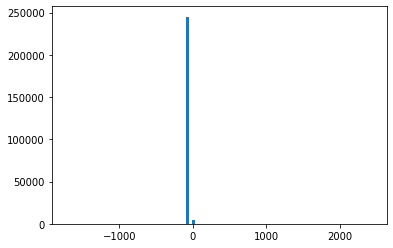

In [ ]:
plt.hist(pklon, bins=100);

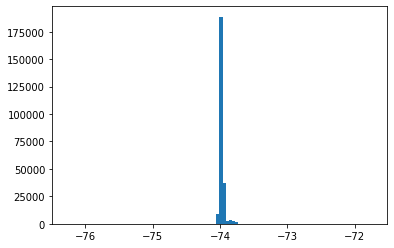

In [ ]:
plt.hist(pklon[(pklon> pklon.median()-2.5)&(pklon<pklon.median()+2.5)], bins=100);

In [ ]:
pklon_val = (pklon > pklon.median()-0.5) & (pklon<pklon.median()+0.5)

print (pklon_val.value_counts())
print (pklon_val.value_counts(normalize=True))

True     244936
False      5064
Name: pickup_longitude, dtype: int64
True     0.979744
False    0.020256
Name: pickup_longitude, dtype: float64


In [ ]:
#pickup latitude
pklat = train['pickup_latitude']
pklat.describe()

count    250000.000000
mean         39.981701
std           9.142210
min        -778.582153
25%          40.734913
50%          40.752644
75%          40.767101
max        3361.266357
Name: pickup_latitude, dtype: float64

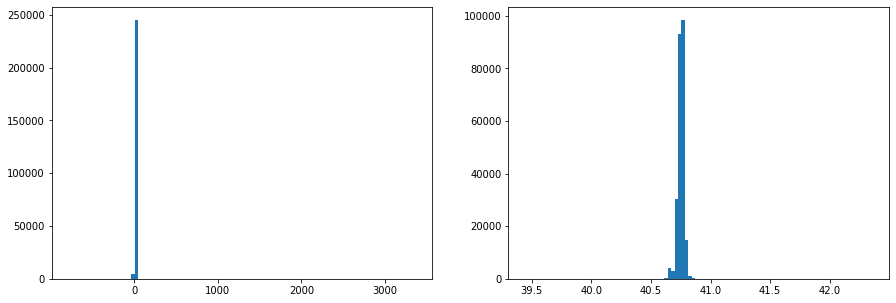

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(pklat, bins=100)
ax[1].hist(pklat[(pklat>pklat.median()-2.5) & (pklat<pklat.median()+2.5)], bins=100);

In [ ]:
pklat_val = (pklat > pklat.median()-0.5) & (pklat<pklat.median()+0.5)

print (pklat_val.value_counts())
print (pklat_val.value_counts(normalize=True))


True     244980
False      5020
Name: pickup_latitude, dtype: int64
True     0.97992
False    0.02008
Name: pickup_latitude, dtype: float64


In [ ]:
#drop_longitude
dplong = train['dropoff_longitude']

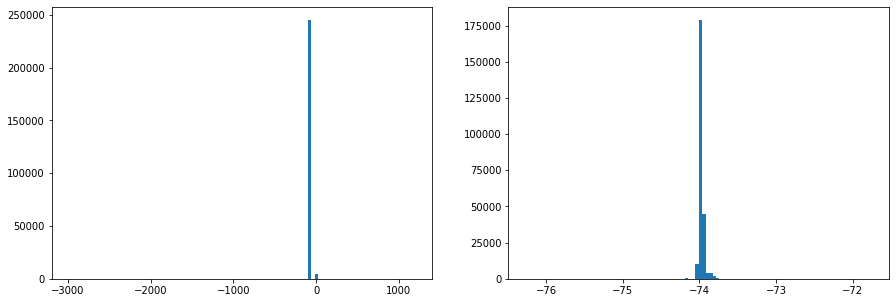

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(dplong, bins=100)
ax[1].hist(dplong[(dplong>dplong.median()-2.5) & (dplong<dplong.median()+2.5)], bins=100);

In [ ]:
dplong_val = (dplong > dplong.median()-0.5) & (dplong<pklat.median()+0.5)

print (dplong_val.value_counts())
print (dplong_val.value_counts(normalize=True))

True     249963
False        37
Name: dropoff_longitude, dtype: int64
True     0.999852
False    0.000148
Name: dropoff_longitude, dtype: float64


In [ ]:
#drop_latitude

dplat=train['dropoff_latitude']

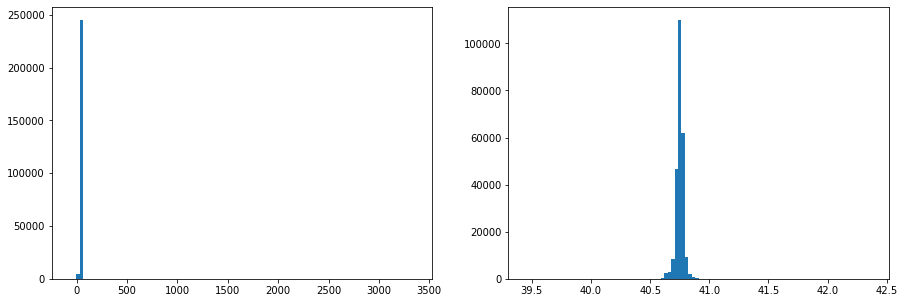

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(dplat, bins=100)
ax[1].hist(dplat[(dplat>dplat.median()-2.5) & (dplat<dplat.median()+2.5)], bins=100);

In [ ]:
dplat_val = (dplat > dplat.median()-0.5) & (dplat<dplat.median()+0.5)

print (dplat_val.value_counts())
print (dplat_val.value_counts(normalize=True))

True     245032
False      4968
Name: dropoff_latitude, dtype: int64
True     0.980128
False    0.019872
Name: dropoff_latitude, dtype: float64


In [ ]:
#passenger_count

pas = train['passenger_count']
pas.describe()

count    250000.000000
mean          1.686408
std           1.310720
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [ ]:
(pas==0).value_counts()

False    249064
True        936
Name: passenger_count, dtype: int64

In [ ]:
(pas>=6).sum()

5310

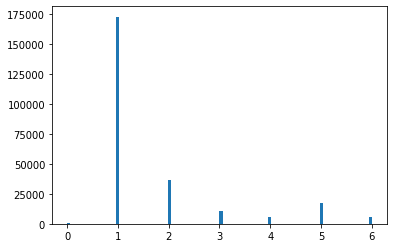

In [ ]:
plt.hist(pas, bins=100);

In [ ]:
pas_val = (pas >=1) & (pas<=6)
print (pas_val.value_counts())
print (pas_val.value_counts(normalize=True))

True     249064
False       936
Name: passenger_count, dtype: int64
True     0.996256
False    0.003744
Name: passenger_count, dtype: float64


In [ ]:
#fare_amount

fare = train['fare_amount']
fare.describe()

count    250000.000000
mean         11.341281
std           9.802264
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

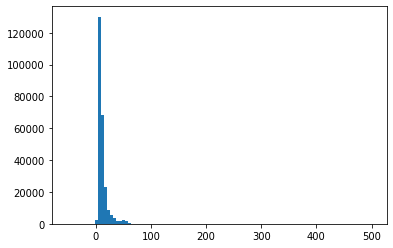

In [ ]:
plt.hist(fare, bins=100);

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

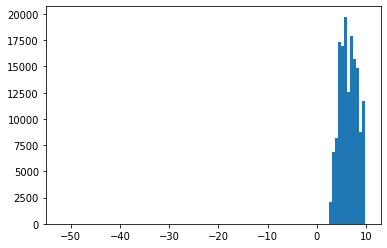

In [ ]:
plt.hist(fare[fare<10], bins=100)

(0.0, 150.0)

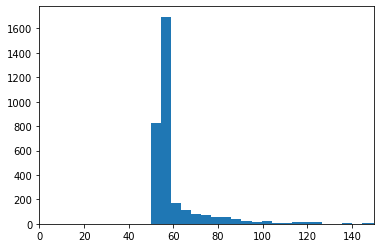

In [ ]:
plt.hist(fare[fare>50], bins=100)
plt.xlim(0,150)

In [ ]:
fare_val = (fare>2)&(fare<150)

print (fare_val.value_counts())
print (fare_val.value_counts(normalize=True))

True     249953
False        47
Name: fare_amount, dtype: int64
True     0.999812
False    0.000188
Name: fare_amount, dtype: float64


In [ ]:
val_entradas = fare_val & pklat_val & pklon_val &  dplat_val & dplong_val & pas_val

In [ ]:
print (val_entradas.value_counts())
print (val_entradas.value_counts(normalize=True))

True     243708
False      6292
dtype: int64
True     0.974832
False    0.025168
dtype: float64


In [ ]:
train = train.drop(val_entradas[val_entradas==False].index)

In [ ]:
#Engineering Features
#duração

In [ ]:
#hora do dia
train['hour_day'] = train['pickup_datetime'].map(lambda x: x.timetuple().tm_hour)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_day
0,12.9,2010-04-11 01:44:00,-73.986107,40.722446,-73.954643,40.780273,3,1
1,12.5,2013-04-27 12:26:11,-73.959747,40.767151,-73.984932,40.760914,2,12
2,4.0,2014-11-08 09:51:00,-74.008591,40.714714,-74.012383,40.719513,1,9
3,12.0,2012-10-07 01:15:27,-73.978516,40.763798,-73.990303,40.725208,1,1
4,6.5,2012-03-07 10:04:47,-73.980339,40.775394,-73.992287,40.758877,1,10


In [ ]:
train['day_week'] = train['pickup_datetime'].map(lambda x: x.timetuple().tm_wday)
train['day_year'] = train['pickup_datetime'].map(lambda x: x.timetuple().tm_yday)
train['year'] = train['pickup_datetime'].map(lambda x: x.timetuple().tm_year)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_day,day_week,day_year,year
0,12.9,2010-04-11 01:44:00,-73.986107,40.722446,-73.954643,40.780273,3,1,6,101,2010
1,12.5,2013-04-27 12:26:11,-73.959747,40.767151,-73.984932,40.760914,2,12,5,117,2013
2,4.0,2014-11-08 09:51:00,-74.008591,40.714714,-74.012383,40.719513,1,9,5,312,2014
3,12.0,2012-10-07 01:15:27,-73.978516,40.763798,-73.990303,40.725208,1,1,6,281,2012
4,6.5,2012-03-07 10:04:47,-73.980339,40.775394,-73.992287,40.758877,1,10,2,67,2012


In [ ]:
len(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'])

91

In [ ]:
#não tem muitos registros 02-29 fevereiro bicestos

train.drop(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'].index, inplace=True)

In [ ]:
#fazendo a correcao dos dias 
#temos apenas o 2012 como bicesto

condicion = (train['year']==2012) & (train['day_year']> 59) #31 de jan + 28 fev
train['day_year'][condicion] = train['day_year'] - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


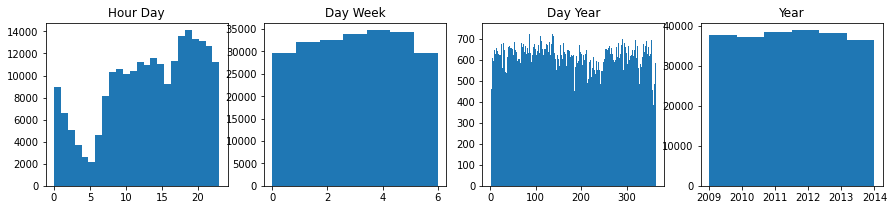

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(15,3))
train_not_2015 = train[train['year']<2015] # a base vai até metade de 2015 então faremos antes de 2015
ax[0].hist(train_not_2015['hour_day'], bins=24)
ax[0].set_title('Hour Day')

ax[1].hist(train_not_2015['day_week'], bins=7)
ax[1].set_title('Day Week')

ax[2].hist(train_not_2015['day_year'], bins=365)
ax[2].set_title('Day Year')

ax[3].hist(train_not_2015['year'], bins=6)
ax[3].set_title('Year');

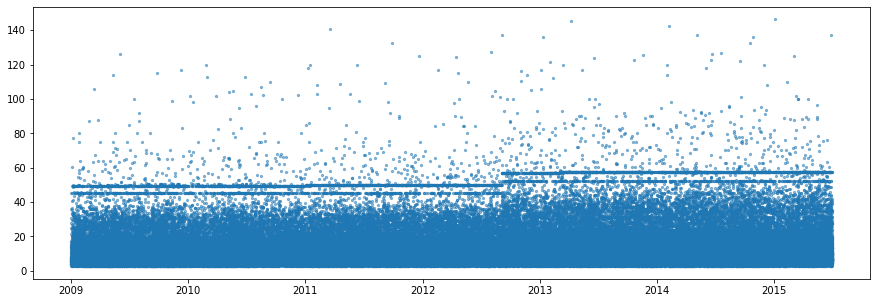

In [ ]:
#relação entre pickup datetime e a demanda

plt.figure(figsize=(15,5))
plt.scatter(train['pickup_datetime'], train['fare_amount'], s=5, alpha=0.5)

In [ ]:
from collections import Counter
fare_zoom = train['fare_amount'][(train['fare_amount']> 40) & (train['fare_amount']< 60)]

In [ ]:
common_fare_zoom = Counter(fare_zoom)
common_fare_zoom

In [ ]:
most_common_fare_zoom = common_fare_zoom.most_common(10)
most_common_fare_zoom


[(57.33, 1090),
 (49.8, 719),
 (45.0, 660),
 (49.57, 491),
 (52.0, 458),
 (56.8, 232),
 (57.54, 166),
 (49.15, 146),
 (50.5, 66),
 (50.0, 64)]

<BarContainer object of 10 artists>

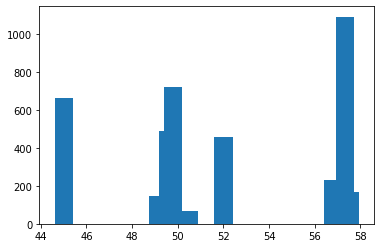

In [ ]:
plt.bar([x[0] for x in most_common_fare_zoom], [x[1] for x in most_common_fare_zoom])

In [ ]:
from mpl_toolkits.basemap import Basemap

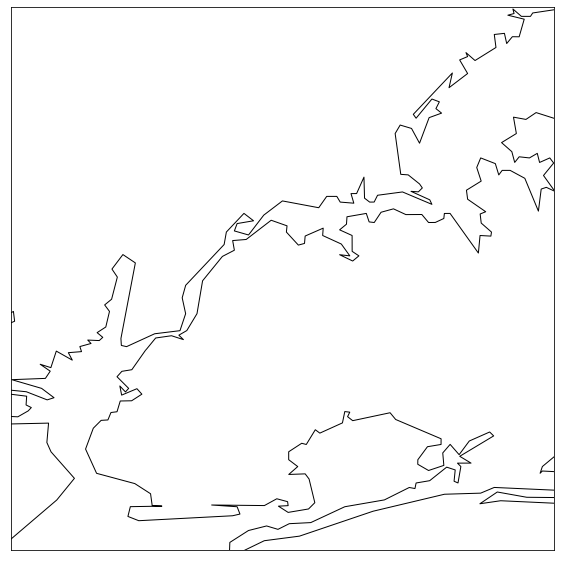

In [ ]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat = lat1, urcrnrlat =lat2,
            llcrnrlon = lon1 , urcrnrlon = lon2)
m.drawcoastlines()

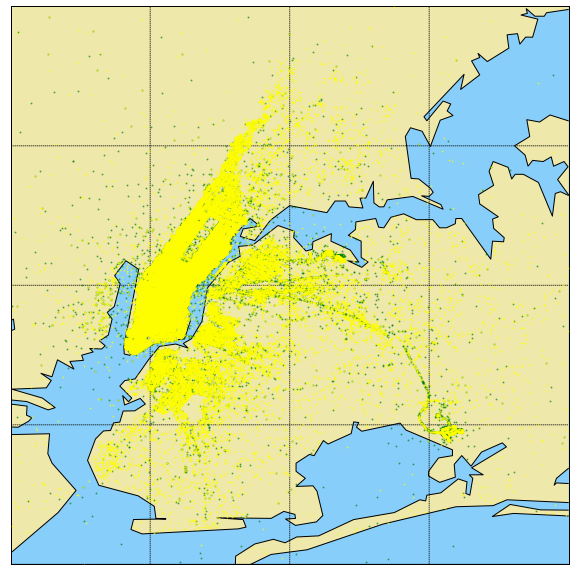

In [ ]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize=(10,15))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat = lat1, urcrnrlat =lat2,
            llcrnrlon = lon1 , urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')

m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), label = [1,0,0,0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), label = [0,0,0,1]);

#pickup location - de todas as saidas (verde)
m.scatter(train['pickup_longitude'], train['pickup_latitude'], s=1, c='green', alpha=0.5 , zorder=5)

#drop location - de todas as saidas (amarelo)
m.scatter(train['dropoff_longitude'], train['dropoff_latitude'], s=1, c='yellow', alpha=0.5 , zorder=5) #zorder é sobrepor quanto maior o numero mais fica em cima

In [ ]:
#distancia  | np.radian para calcular a distancia de lon e lat
#distancia euclidiana e mahathan 

#latitude do ponto inicial (pickup_latitude)
#longitude do ponto inicial (pickup_longitude)
#latitude do ponto final (dropoff_latitude)
#lontitude do ponto final (dropoff_lontitude)

lon1, lon2 = np.radians(train['pickup_longitude']), np.radians(train['dropoff_longitude'])

lat1, lat2 = np.radians(train['pickup_latitude']), np.radians(train['dropoff_latitude'])

In [ ]:
dislon = lon2-lon1
dislat = lat2 - lat1

In [ ]:
#calculo da distancia euclidiana em km
#formula de haversine

a= np.sin(dislat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dislon/2)**2
c= 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

train['eucl_distacia'] = 6373 * c # 6373 é uma constante 

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_day,day_week,day_year,year,eucl_distnacia
0,12.9,2010-04-11 01:44:00,-73.986107,40.722446,-73.954643,40.780273,3,1,6,101,2010,6.957013
1,12.5,2013-04-27 12:26:11,-73.959747,40.767151,-73.984932,40.760914,2,12,5,117,2013,2.232188
2,4.0,2014-11-08 09:51:00,-74.008591,40.714714,-74.012383,40.719513,1,9,5,312,2014,0.622071
3,12.0,2012-10-07 01:15:27,-73.978516,40.763798,-73.990303,40.725208,1,1,6,280,2012,4.405889
4,6.5,2012-03-07 10:04:47,-73.980339,40.775394,-73.992287,40.758877,1,10,2,66,2012,2.094598


In [ ]:
#calculo da distancia manhathan em km
a1 = np.sin(dislon/2)**2 
c1 = 2*np.arctan2(np.sqrt(a1), np.sqrt(1-a1))
a2 = np.sin(dislat/2)**2
c2 = 2*np.arctan2(np.sqrt(a2), np.sqrt(1-a2))

In [ ]:
train['manh_distancia'] = 6373 *(c1 + c2)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_day,day_week,day_year,year,eucl_distnacia,eucl_distacia,manh_distancia
0,12.9,2010-04-11 01:44:00,-73.986107,40.722446,-73.954643,40.780273,3,1,6,101,2010,6.957013,6.957013,9.931450
1,12.5,2013-04-27 12:26:11,-73.959747,40.767151,-73.984932,40.760914,2,12,5,117,2013,2.232188,2.232188,3.495095
2,4.0,2014-11-08 09:51:00,-74.008591,40.714714,-74.012383,40.719513,1,9,5,312,2014,0.622071,0.622071,0.955349
3,12.0,2012-10-07 01:15:27,-73.978516,40.763798,-73.990303,40.725208,1,1,6,280,2012,4.405889,4.405889,5.603701
4,6.5,2012-03-07 10:04:47,-73.980339,40.775394,-73.992287,40.758877,1,10,2,66,2012,2.094598,2.094598,3.165757


In [ ]:
train.drop(['eucl_distnacia'], axis=1, inplace=True)

In [ ]:
#pre-processamento 

X_train = train.drop(columns=["pickup_datetime", "fare_amount"])
y_train = train['fare_amount']

X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_day,day_week,day_year,year,eucl_distacia,manh_distancia
0,-73.986107,40.722446,-73.954643,40.780273,3,1,6,101,2010,6.957013,9.931450
1,-73.959747,40.767151,-73.984932,40.760914,2,12,5,117,2013,2.232188,3.495095
2,-74.008591,40.714714,-74.012383,40.719513,1,9,5,312,2014,0.622071,0.955349
3,-73.978516,40.763798,-73.990303,40.725208,1,1,6,280,2012,4.405889,5.603701
4,-73.980339,40.775394,-73.992287,40.758877,1,10,2,66,2012,2.094598,3.165757


In [ ]:
#normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train_scaler[0]

array([0.49611227, 0.49590925, 0.00648481, 0.55452242, 0.4       ,
       0.04347826, 1.        , 0.27472527, 0.16666667, 0.00115272,
       0.00120461])

In [ ]:
#treinamento 
import multiprocessing
from sklearn.model_selection import cross_val_score
cv =5
scoring = 'neg_mean_squared_error' #RMSE a pedido do desafio
n_jobs = multiprocessing.cpu_count()-1


In [ ]:
#linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean()) 

6.354876813668845

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

model = Ridge()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

8.136053764185682

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

9.557912916159589

In [ ]:
#Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

8.27395331127723

In [ ]:
#decision Tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

5.267265714373942

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

3.693220684214605

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

3.946168414943308

In [ ]:
#deep learning
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
scores = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
np.sqrt(-scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4.344266206795513

In [ ]:
#inspecionando o melhor modelo 

#dividindo o modelo 
from sklearn.model_selection import train_test_split

X_train1, X_test, y_train1, y_test = train_test_split(X_train_scaler, y_train, test_size=0.2)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
feature_importance = model.feature_importances_

In [ ]:
feature_importance

array([0.02795846, 0.01951676, 0.05242848, 0.02732582, 0.00366229,
       0.01439621, 0.00720449, 0.01799847, 0.02554724, 0.77268475,
       0.03127703])

In [ ]:
argsort = np.argsort(feature_importance)
argsort

array([ 4,  6,  5,  7,  1,  8,  3,  0, 10,  2,  9])

In [ ]:
features_importance_sorted = feature_importance[argsort]
features_importance_sorted 

array([0.00366229, 0.00720449, 0.01439621, 0.01799847, 0.01951676,
       0.02554724, 0.02732582, 0.02795846, 0.03127703, 0.05242848,
       0.77268475])

In [ ]:
features_names = X_train.columns
features_names

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour_day', 'day_week',
       'day_year', 'year', 'eucl_distacia', 'manh_distancia'],
      dtype='object')

In [ ]:
feature_sorted = features_names[argsort]
feature_sorted

Index(['passenger_count', 'day_week', 'hour_day', 'day_year',
       'pickup_latitude', 'dropoff_latitude', 'year', 'pickup_longitude',
       'manh_distancia', 'dropoff_longitude', 'eucl_distacia'],
      dtype='object')

In [ ]:
pd.DataFrame(feature_sorted, features_importance_sorted)

,0
0.003662,passenger_count
0.007204,day_week
0.014396,hour_day
0.017998,day_year
0.019517,pickup_latitude
0.025547,dropoff_latitude
0.027326,year
0.027958,pickup_longitude
0.031277,manh_distancia
0.052428,dropoff_longitude


<BarContainer object of 11 artists>

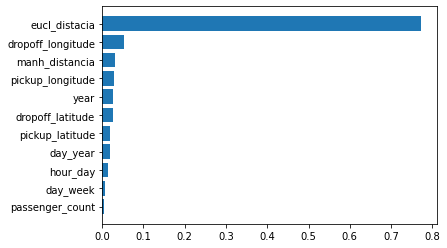

In [ ]:
plt.barh(feature_sorted, features_importance_sorted)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred, squared=False)
rmse_test

3.6449455295406383

In [ ]:
pred_test = model.score(X_test, y_test)
pred_train = model.score(X_train_scaler, y_train)

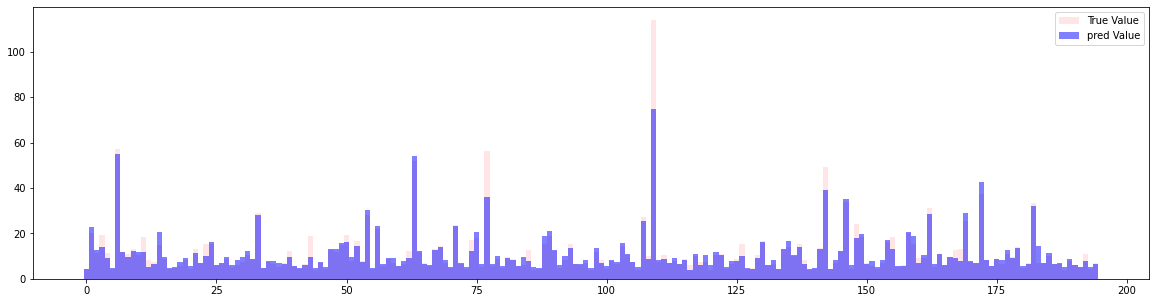

In [ ]:
#comparando as previsões com as respostas reais
every = int(sample_size/1000) #250.000 dados divido por 1000

fig = plt.figure(figsize=(20,5))
plt.bar(list(range(len(y_test[::every]))), y_test.values[::every],
alpha=0.1, color='red', width = 1, label='True Value')
plt.bar(list(range(len(y_pred[::every]))), y_pred[::every],
alpha=0.5, color='blue', width = 1, label='pred Value')
plt.legend()

In [ ]:
#submeter 
test = pd.read_csv('/content/TrainTest/test.csv', 
                    parse_dates=['pickup_datetime'],
                    dtype = {'fare_amont': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude':np.float32,
                             'dropoff_longitude':np.float32,
                             'passenger_count':np.int32,
                             'key':str
                             })

In [ ]:
test.shape

(11084772, 7)